In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

from collections import Counter

sns.set(rc={'figure.figsize': (11.7, 8.27)})
rcParams['figure.figsize'] = 11.7,8.27
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

Custom DateUtils
---

In [20]:
DAYS = {
    "월" : 0,
    "화" : 1,
    "수" : 2,
    "목" : 3,
    "금" : 4,
    "토" : 5,
    "일" : 6
}

DAYSKR = ["월","화","수","목","금","토","일"];

SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

SEASONSKR = {
    "03":"봄",
    "04":"봄",
    "05":"봄",
    "06":"여름",
    "07":"여름",
    "08":"여름",
    "09":"가을",
    "10":"가을",
    "11":"가을",
    "12":"겨울",
    "01":"겨울",
    "02":"겨울",
}

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

def weekday_kr(weekday):
    return DAYSKR[weekday]

def seasons_kr(month):
    return SEASONSKR[month]

In Label
---

In [23]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)

dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]

searchKeyword = '아파트1-104-1206'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas['day_kr'] = [weekday_kr(dt.weekday()) for dt in tsDatas['date']]
tsDatas['season'] = [seasons_kr(m) for m in tsDatas['month']]
# tsDatas.reindex(columns=['date', 'year', 'month', 'day'])
tsDatas

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,year,month,day,day_kr,season
0,2018-05-01,0.085,0.086,0.085,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,0.085,0.085,0.084,0.084,0.054,0.046,0.051,0.050,0.050,0.038,0.031,0.051,0.051,0.051,0.047,0.030,0.042,0.051,0.048,0.051,0.034,0.034,0.051,0.050,0.051,0.043,0.028,0.047,0.051,0.051,0.050,0.036,0.032,0.051,0.050,0.049,...,0.041,0.051,0.051,0.058,0.055,0.045,0.054,0.056,0.057,0.094,0.055,0.056,0.052,0.051,0.051,0.050,0.051,0.050,0.049,0.050,0.049,0.049,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.050,0.050,0.049,0.062,0.085,0.084,0.083,0.083,0.063,0.074,0.084,0.085,0.083,0.066,0.069,0.087,2018,05,01,화,봄
1,2018-05-02,0.092,0.082,0.050,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,0.054,0.057,0.056,0.039,0.056,0.052,0.052,0.051,0.051,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.103,0.063,0.050,0.050,0.050,0.050,0.045,0.031,0.047,0.051,0.050,0.050,0.035,0.036,0.051,0.051,0.050,0.050,...,0.051,0.049,0.050,0.049,0.043,0.029,0.046,0.050,0.050,0.049,0.049,0.030,0.040,0.050,0.050,0.051,0.045,0.030,0.046,0.051,0.050,0.050,0.055,0.057,0.056,0.039,0.056,0.053,0.052,0.052,0.051,0.052,0.051,0.050,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.049,0.049,0.049,0.049,2018,05,02,수,봄
2,2018-05-03,0.049,0.049,0.048,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,0.029,0.038,0.050,0.049,0.033,0.030,0.051,0.050,0.040,0.030,0.044,0.050,0.047,0.029,0.036,0.050,0.050,0.035,0.038,0.088,0.051,0.050,0.037,0.030,0.049,0.050,0.049,0.037,0.029,0.050,0.051,0.057,0.057,0.051,0.047,0.054,...,0.052,0.051,0.050,0.051,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.051,0.050,0.050,0.050,0.048,0.030,0.041,0.050,0.051,0.040,0.030,0.046,0.051,0.049,0.033,0.034,0.050,0.050,0.045,0.030,0.043,0.051,0.050,0.058,0.065,0.084,0.085,0.081,0.065,0.072,0.085,0.084,0.069,0.064,2018,05,03,목,봄
3,2018-05-04,0.083,0.085,0.077,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,0.078,0.084,0.083,0.063,0.069,0.089,0.090,0.060,0.043,0.059,0.055,0.056,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.093,0.050,0.050,0.049,0.049,0.053,0.034,0.051,0.053,0.053,0.053,0.052,0.052,0.053,0.052,0.052,0.053,...,0.052,0.052,0.052,0.052,0.048,0.033,0.044,0.054,0.052,0.049,0.033,0.045,0.053,0.053,0.051,0.034,0.043,0.053,0.053,0.053,0.047,0.034,0.047,0.054,0.053,0.053,0.059,0.081,0.150,0.075,0.087,0.084,0.084,0.082,0.083,0.083,0.081,0.082,0.081,0.081,0.080,0.080,0.084,0.085,0.085,2018,05,04,금,봄
4,2018-05-05,0.085,0.074,0.065,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,0.051,0.050,0.030,0.034,0.051,0.050,0.036,0.030,0.048,0.051,0.045,0.029,0.039,0.051,0.050,0.035,0.030,0.049,0.050,0.047,0.029,0.035,0.051,0.050,0.043,0.030,0.043,0.050,0.050,0.040,0.029,0.046,0.051,0.050,0.041,0.033,...,0.056,0.059,0.059,0.044,0.058,0.056,0.055,0.055,0.056,0.066,0.113,0.091,0.082,0.081,0.081,0.154,0.083,0.087,0.109,0.108,0.104,0.105,0.104,0.104,0.106,0.103,0.102,0.102,0.102,0.104,0.108,0.143,0.109,0.107,0.107,0.102,0.103,0.103,0.105,0.105,0.098,0.101,0.101,0.101,0.100,2018,05,05,토,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-04-26,0.050,0.043,0.042,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,0.008,0.008,0.016,0.025,0.015,0.008,0.008,0.007,0.020,0.024,0.012,0.008,0.021,0.020,0.022,0.023,0.009,0.007,0.007,0.007,0.025,0.023,0.007,0.007,0.008,0.010,0.024,0.020,0.007,0.007,0.007,0.014,0.024,0.018,0.00

In [24]:
datas = tsDatas.copy()
datas

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,year,month,day,day_kr,season
0,2018-05-01,0.085,0.086,0.085,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,0.085,0.085,0.084,0.084,0.054,0.046,0.051,0.050,0.050,0.038,0.031,0.051,0.051,0.051,0.047,0.030,0.042,0.051,0.048,0.051,0.034,0.034,0.051,0.050,0.051,0.043,0.028,0.047,0.051,0.051,0.050,0.036,0.032,0.051,0.050,0.049,...,0.041,0.051,0.051,0.058,0.055,0.045,0.054,0.056,0.057,0.094,0.055,0.056,0.052,0.051,0.051,0.050,0.051,0.050,0.049,0.050,0.049,0.049,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.050,0.050,0.049,0.062,0.085,0.084,0.083,0.083,0.063,0.074,0.084,0.085,0.083,0.066,0.069,0.087,2018,05,01,화,봄
1,2018-05-02,0.092,0.082,0.050,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,0.054,0.057,0.056,0.039,0.056,0.052,0.052,0.051,0.051,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.049,0.050,0.103,0.063,0.050,0.050,0.050,0.050,0.045,0.031,0.047,0.051,0.050,0.050,0.035,0.036,0.051,0.051,0.050,0.050,...,0.051,0.049,0.050,0.049,0.043,0.029,0.046,0.050,0.050,0.049,0.049,0.030,0.040,0.050,0.050,0.051,0.045,0.030,0.046,0.051,0.050,0.050,0.055,0.057,0.056,0.039,0.056,0.053,0.052,0.052,0.051,0.052,0.051,0.050,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.049,0.049,0.049,0.049,2018,05,02,수,봄
2,2018-05-03,0.049,0.049,0.048,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,0.029,0.038,0.050,0.049,0.033,0.030,0.051,0.050,0.040,0.030,0.044,0.050,0.047,0.029,0.036,0.050,0.050,0.035,0.038,0.088,0.051,0.050,0.037,0.030,0.049,0.050,0.049,0.037,0.029,0.050,0.051,0.057,0.057,0.051,0.047,0.054,...,0.052,0.051,0.050,0.051,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.051,0.050,0.050,0.050,0.048,0.030,0.041,0.050,0.051,0.040,0.030,0.046,0.051,0.049,0.033,0.034,0.050,0.050,0.045,0.030,0.043,0.051,0.050,0.058,0.065,0.084,0.085,0.081,0.065,0.072,0.085,0.084,0.069,0.064,2018,05,03,목,봄
3,2018-05-04,0.083,0.085,0.077,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,0.078,0.084,0.083,0.063,0.069,0.089,0.090,0.060,0.043,0.059,0.055,0.056,0.054,0.054,0.054,0.053,0.053,0.053,0.053,0.093,0.050,0.050,0.049,0.049,0.053,0.034,0.051,0.053,0.053,0.053,0.052,0.052,0.053,0.052,0.052,0.053,...,0.052,0.052,0.052,0.052,0.048,0.033,0.044,0.054,0.052,0.049,0.033,0.045,0.053,0.053,0.051,0.034,0.043,0.053,0.053,0.053,0.047,0.034,0.047,0.054,0.053,0.053,0.059,0.081,0.150,0.075,0.087,0.084,0.084,0.082,0.083,0.083,0.081,0.082,0.081,0.081,0.080,0.080,0.084,0.085,0.085,2018,05,04,금,봄
4,2018-05-05,0.085,0.074,0.065,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,0.051,0.050,0.030,0.034,0.051,0.050,0.036,0.030,0.048,0.051,0.045,0.029,0.039,0.051,0.050,0.035,0.030,0.049,0.050,0.047,0.029,0.035,0.051,0.050,0.043,0.030,0.043,0.050,0.050,0.040,0.029,0.046,0.051,0.050,0.041,0.033,...,0.056,0.059,0.059,0.044,0.058,0.056,0.055,0.055,0.056,0.066,0.113,0.091,0.082,0.081,0.081,0.154,0.083,0.087,0.109,0.108,0.104,0.105,0.104,0.104,0.106,0.103,0.102,0.102,0.102,0.104,0.108,0.143,0.109,0.107,0.107,0.102,0.103,0.103,0.105,0.105,0.098,0.101,0.101,0.101,0.100,2018,05,05,토,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-04-26,0.050,0.043,0.042,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,0.008,0.008,0.016,0.025,0.015,0.008,0.008,0.007,0.020,0.024,0.012,0.008,0.021,0.020,0.022,0.023,0.009,0.007,0.007,0.007,0.025,0.023,0.007,0.007,0.008,0.010,0.024,0.020,0.007,0.007,0.007,0.014,0.024,0.018,0.00

In [26]:
dpp = datas[datas.columns.difference(['date', 'year', 'month', 'day', 'day_kr', 'season'])].copy()

selScaler = "STD"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = datas['date']
dpp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-01,0.322976,0.330478,0.342169,0.360291,0.318606,0.351066,0.347564,0.378325,0.406667,0.411437,0.423955,0.256647,0.158223,0.536394,0.507157,0.453999,0.431456,0.046382,-0.077125,0.019852,0.029437,0.011365,-0.172116,-0.276430,0.038435,0.032925,0.074929,-0.010456,-0.295330,-0.088625,0.076931,-0.032913,0.138959,-0.094522,-0.065033,0.453320,0.314432,0.424570,0.149712,-0.261535,0.296931,0.411587,0.438843,0.429942,-0.048691,-0.171070,0.280021,0.372144,0.289649,0.278654,-0.266509,0.096516,0.480291,0.507120,0.713550,0.581762,0.199675,0.472546,0.629077,0.713295,2.478246,0.712288,0.551965,0.376250,0.294251,0.264713,0.262889,0.306444,0.220292,0.234591,0.299375,0.300689,0.281728,0.255852,0.268214,0.186793,0.022224,-0.081068,-0.100438,-0.175618,-0.159981,-0.148480,-0.160968,0.083300,0.454485,0.373120,0.394997,0.354339,0.004505,0.189992,0.249941,0.218675,0.166135,-0.019943,0.046107,0.331669
2018-05-02,0.422302,0.274052,-0.150195,-0.124656,-0.143784,-0.127780,-0.101188,-0.110434,-0.088889,-0.074842,-0.121220,-0.342743,-0.157202,0.046381,0.074435,0.045668,-0.208135,0.077417,0.016450,0.035813,0.046147,0.027137,0.023847,0.038614,0.021674,0.016117,0.057771,0.022163,0.029404,0.030741,0.060035,0.917774,0.393619,0.374873,0.428845,0.421845,0.314432,0.243533,-0.162099,0.273493,0.412137,0.383108,0.407968,-0.033704,-0.048691,0.379705,0.280021,0.372144,0.318015,-0.180364,-0.033296,0.397099,0.411381,0.471178,0.407903,0.191724,-0.274351,0.229103,0.423943,0.461573,0.552194,0.478173,-0.280412,0.025915,0.268208,0.240744,0.288470,0.150080,-0.243815,0.159061,0.327123,0.332163,0.311937,0.399833,0.538743,0.387997,-0.194086,0.051792,-0.023904,-0.128358,-0.128570,-0.131804,-0.106834,-0.135580,-0.193294,-0.190632,-0.202228,-0.219705,-0.201057,-0.207223,-0.250990,-0.256584,-0.268830,-0.238582,-0.224894,-0.203119
2018-05-03,-0.187845,-0.191462,-0.178330,-0.324340,-0.198183,0.392110,-0.101188,-0.110434,-0.176339,-0.375192,-0.149913,-0.057319,-0.085514,-0.348790,-0.219198,-0.041832,-0.066003,-0.279483,-0.326658,0.019852,0.029437,-0.146358,-0.302759,-0.060874,0.021674,-0.034307,-0.302536,-0.189858,0.029404,0.047793,-0.193391,-0.205765,0.924162,0.404210,0.428845,0.012676,-0.193165,0.364224,0.331602,0.329812,0.008917,-0.214962,0.407968,0.460852,0.498543,0.553634,0.280021,0.282089,0.431481,0.326972,0.329480,0.427157,0.480291,0.471178,0.475824,0.451749,0.377435,0.350825,0.458132,0.461573,0.594995,0.517192,0.391892,0.317861,0.268208,0.240744,0.211727,-0.240828,0.011444,0.259768,0.327123,0.017419,-0.292239,0.140667,0.335846,0.186793,-0.323871,-0.365770,-0.081304,-0.159865,-0.238509,-0.481988,-0.269236,-0.135580,-0.193294,-0.071048,0.059058,0.371735,0.381370,0.305846,-0.029991,0.042150,0.191721,0.211556,0.046107,0.007981
2018-05-04,0.294597,0.316371,0.229628,0.060765,0.182609,0.351066,0.347564,0.105195,0.129739,0.440042,0.423955,0.285189,0.143886,0.425746,0.491702,0.439416,0.132980,0.279143,0.593497,0.642314,0.196537,-0.099041,0.170819,0.121520,0.122238,0.083350,0.126402,0.103709,0.078114,0.098950,0.110721,0.053513,1.030271,0.374873,0.428845,0.390371,0.289052,0.484916,-0.084146,0.386130,0.469740,0.468546,0.500592,0.491761,0.368249,0.437681,0.303161,0.432180,0.403114,0.326972,0.355393,0.427157,0.514746,0.543061,0.509785,0.354240,-0.155844,0.168243,0.560699,0.533493,0.552194,-0.146135,0.199805,0.405444,0.346337,0.264713,-0.146407,0.097959,0.289908,0.335298,0.382620,0.237740,-0.171404,0.169463,0.437295,0.301767,0.108747,0.108733,0.511835,1.415477,0.232657,0.468511,0.470594,0.521059,0.398961,0.356037,0.394997,0.319549,0.329980,0.305846,0.205741,0.150781,0.127755,0.211556,0.262909,0.303522
2018-05-05,0.3

In [29]:
pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr['season'] = tsDatas['season']
dr.index = datas['date']
dr

,x,y,season
date,,,
2018-05-01,2.395434,0.715444,봄
2018-05-02,0.941790,1.177524,봄
2018-05-03,0.936708,1.678269,봄
2018-05-04,2.985481,0.229704,봄
2018-05-05,4.450472,4.326155,봄
...,...,...,...
2019-04-26,-5.504005,-1.431791,봄
2019-04-27,-2.975529,1.636607,봄
2019-04-28,-0.889537,0.369483,봄


<AxesSubplot:xlabel='x', ylabel='y'>

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


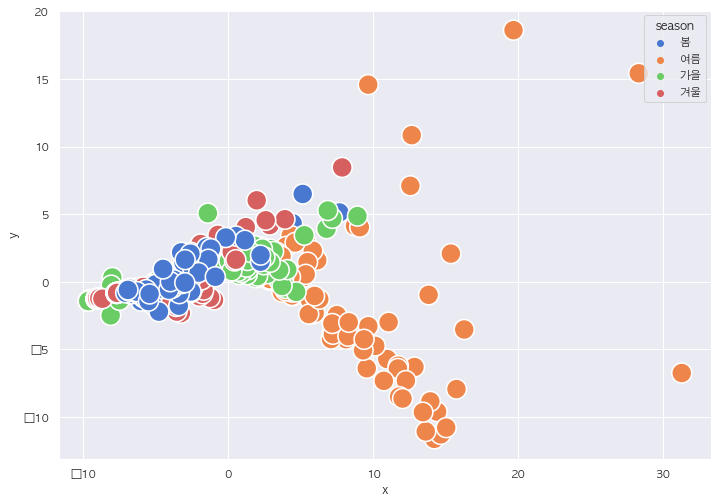

In [33]:
sns.scatterplot(x='x', y="y", 
                palette="muted",
                hue="season",
                s=400,
                data=dr)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [42]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [44]:
col1 = 3
col2 = 0

X = iris.data[:,[col1, col2]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [47]:
X_train

array([[0.5, 5.1],
       [1.3, 5.6],
       [0.3, 5.1],
       [1.8, 6.3],
       [2. , 7.9],
       [1.8, 7.2],
       [1.7, 4.9],
       [0.3, 5.7],
       [1.6, 6.3],
       [2.3, 6.9],
       [1.2, 5.7],
       [1.5, 6.9],
       [1.5, 6.4],
       [0.2, 4.9],
       [1.2, 6.1],
       [0.2, 5.8],
       [0.1, 4.9],
       [0.2, 4.6],
       [1.4, 6.1],
       [0.2, 5.3],
       [1.4, 6.1],
       [1.5, 6.2],
       [0.2, 5.5],
       [2.3, 6.2],
       [1.3, 5.5],
       [0.2, 4.8],
       [0.4, 5.1],
       [2.5, 6.7],
       [1.9, 6.3],
       [0.6, 5. ],
       [1.8, 7.3],
       [1.8, 6.2],
       [1.1, 5.1],
       [1.9, 6.4],
       [1.2, 5.8],
       [1.8, 6.5],
       [0.2, 5.1],
       [1. , 5.5],
       [1.8, 5.9],
       [1.3, 5.7],
       [0.2, 5.2],
       [1.5, 6.3],
       [1.2, 5.5],
       [1.5, 5.9],
       [1.4, 7. ],
       [0.2, 4.6],
       [2.2, 6.4],
       [1.8, 5.9],
       [2.1, 6.7],
       [0.3, 5.1],
       [1.3, 5.6],
       [1.4, 6.8],
       [1.4,

In [48]:
y_train

array([0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0,
       1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2,
       0, 2])

In [46]:
import mglearn